In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-roberta/pytorch/default/1/config.json
/kaggle/input/twitter-roberta/pytorch/default/1/merges.txt
/kaggle/input/twitter-roberta/pytorch/default/1/vocab.json
/kaggle/input/twitter-roberta/pytorch/default/1/pytorch_model.bin
/kaggle/input/twitter-roberta/pytorch/default/1/special_tokens_map.json
/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
import nltk

In [5]:
df = df.head(500)
df.shape

(500, 10)

In [6]:
## quick EDA

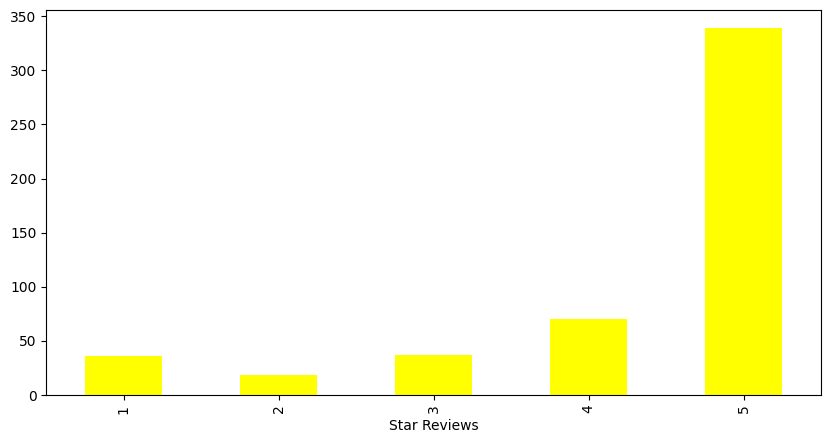

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',figsize=(10,5),color='yellow')
ax.set_xlabel('Star Reviews')
plt.show()

In [8]:
## basic nltk

In [9]:
ex = df['Text'][50]
ex

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [10]:
token = nltk.word_tokenize(ex)
token[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [11]:
tagged = nltk.pos_tag(token)

In [12]:
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [13]:
entities  = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# step 1
# apply vader model

In [14]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
sia = SentimentIntensityAnalyzer()

/usr/local/lib/python3.10/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [15]:
sia.polarity_scores('I am not Good!')

{'neg': 0.574, 'neu': 0.426, 'pos': 0.0, 'compound': -0.4015}

In [16]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [17]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
    

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
resu = pd.DataFrame(res).T

In [19]:
resu = resu.reset_index().rename(columns ={'index' :'Id'})

In [20]:
res = resu.merge(df,how='left')

In [21]:
res.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


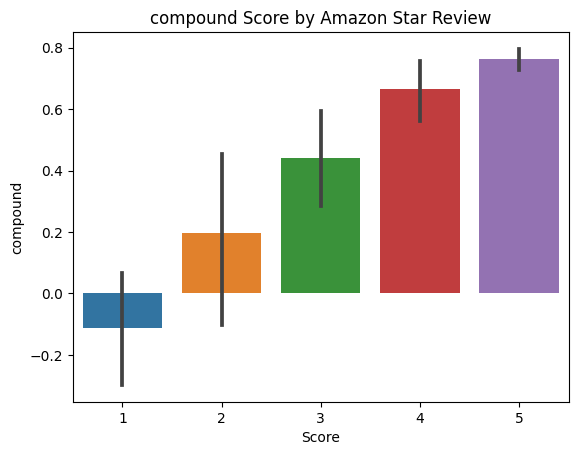

In [22]:
ax = sns.barplot(data=res,x='Score',y='compound')
ax.set_title('compound Score by Amazon Star Review')
plt.show()

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

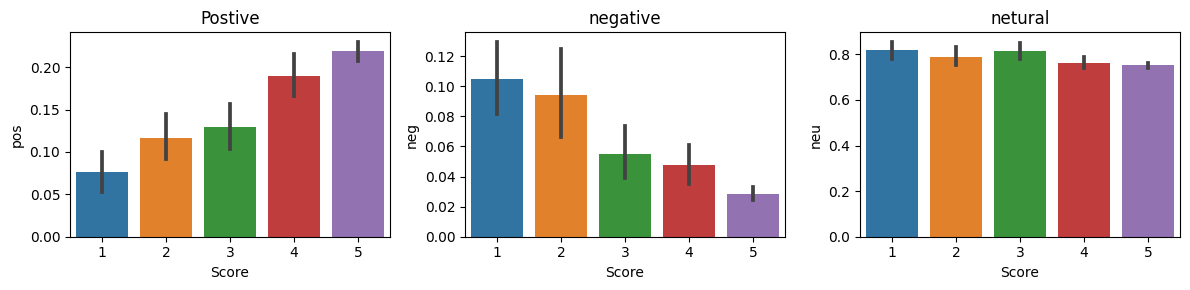

In [24]:
fig , axs = plt.subplots(1,3,figsize = (12,3))

sns.barplot(data=res,x='Score',y='pos',ax = axs[0])
sns.barplot(data=res,x='Score',y='neg',ax = axs[1])
sns.barplot(data=res,x='Score',y='neu',ax = axs[2])
axs[0].set_title('Postive')
axs[1].set_title('negative')
axs[2].set_title('netural')
plt.tight_layout()
plt.show()

## step 2 Roberta Pretrained Model

In [25]:
## Step 3: Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax


In [26]:
model_dir = "/kaggle/input/twitter-roberta/pytorch/default/1"


In [27]:
tokenizer = AutoTokenizer.from_pretrained(model_dir)
model = AutoModelForSequenceClassification.from_pretrained(model_dir)


In [28]:
#vader result example
print(ex)
sia.polarity_scores(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [29]:
# run for Roberta Model
encoded_text = tokenizer(ex,return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'rebera_neg':scores[0],
    'rebera_neu':scores[1],
    'rebera_pos':scores[2],
}
print(scores_dict)

{'rebera_neg': 0.97635514, 'rebera_neu': 0.020687463, 'rebera_pos': 0.0029573694}


In [30]:
def polarity_scores_roberta(ex):
    # run for Roberta Model
    encoded_text = tokenizer(ex,return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'rebera_neg':scores[0],
        'rebera_neu':scores[1],
        'rebera_pos':scores[2],
    }
    return scores_dict
    

In [31]:
res = {}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value 
        reberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **reberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187


In [32]:
resu = pd.DataFrame(res).T
resu = resu.reset_index().rename(columns ={'index' :'Id'})
res = resu.merge(df,how='left')

In [33]:
res.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,rebera_neg,rebera_neu,rebera_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## step 3 compare Scores between model

In [34]:
res.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'rebera_neg', 'rebera_neu', 'rebera_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [35]:
# res.replace([np.inf, -np.inf], np.nan, inplace=True)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

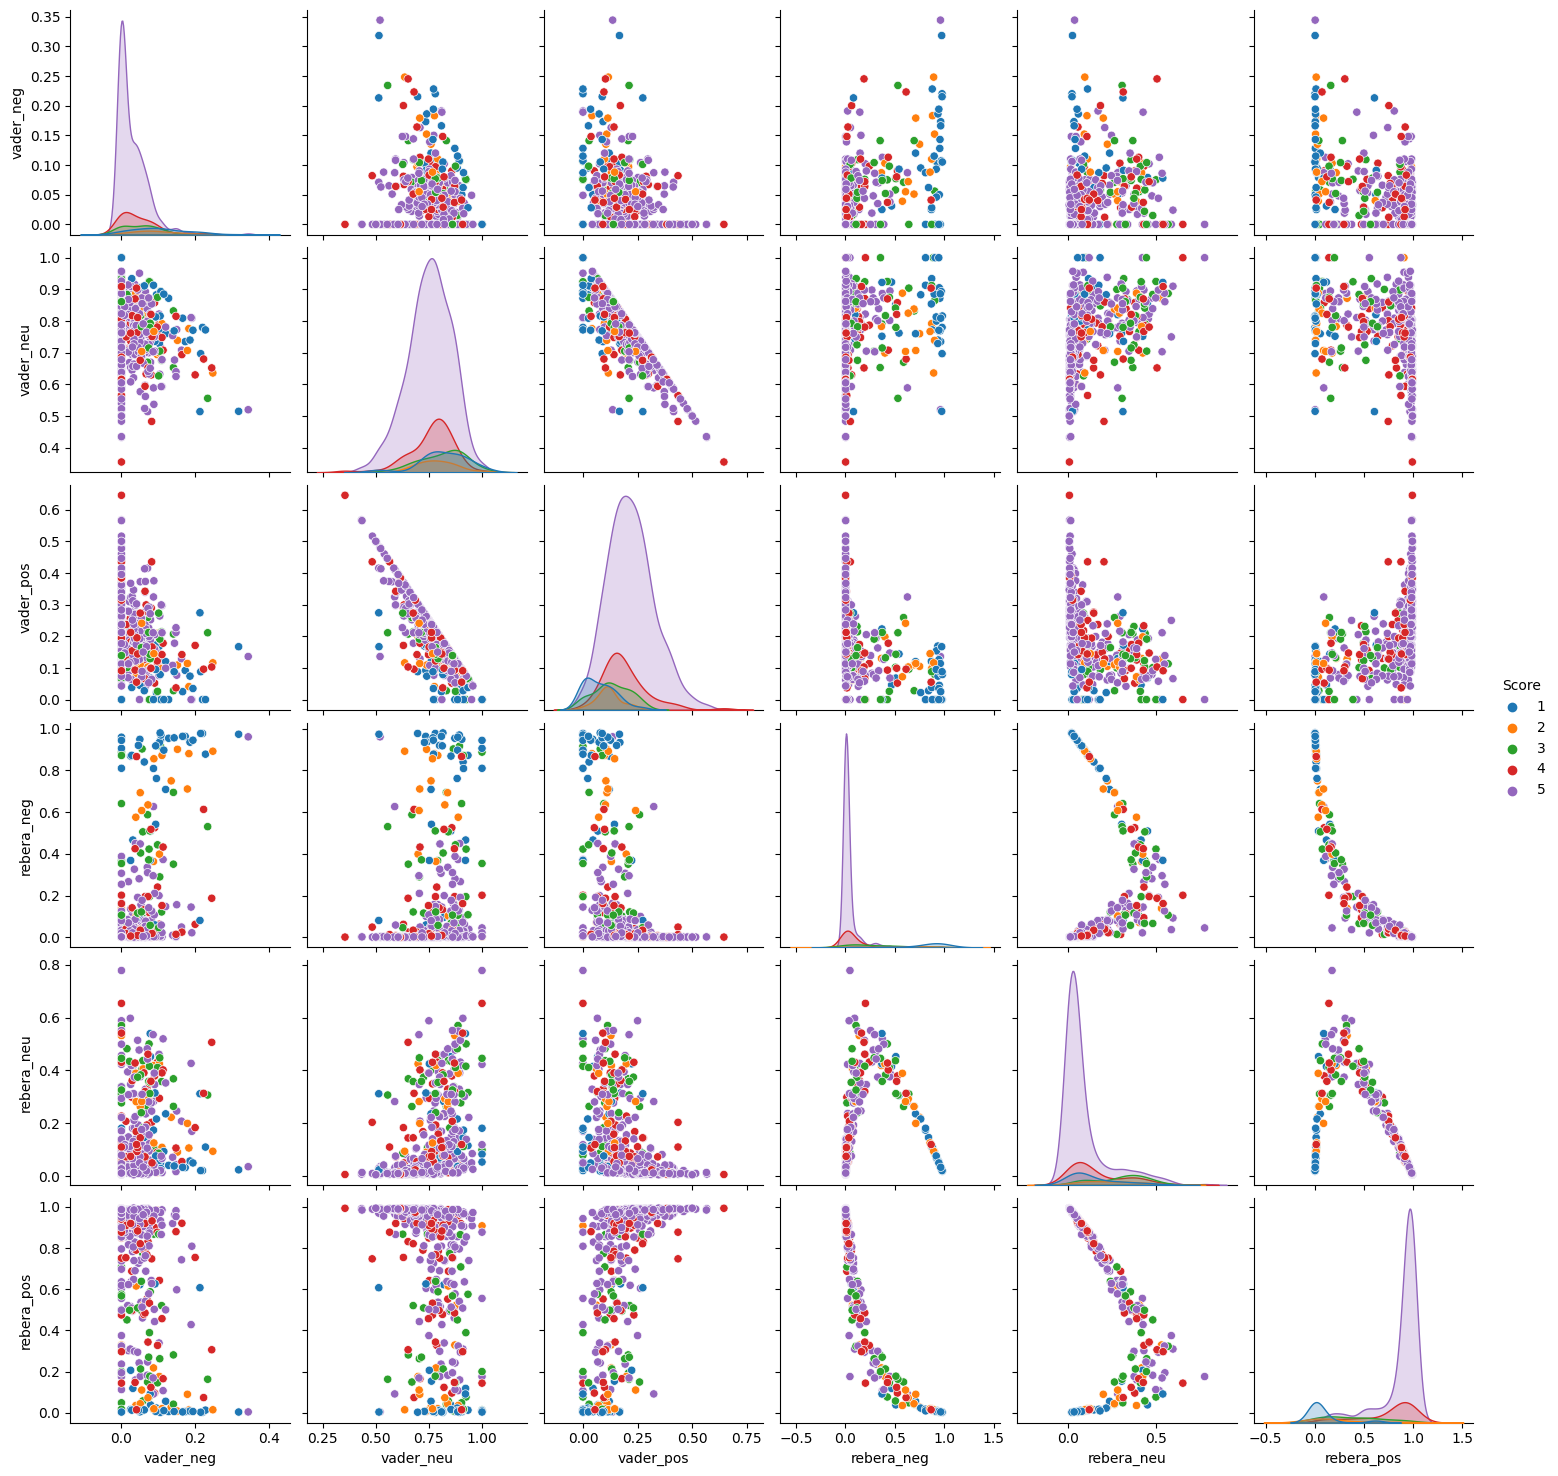

In [42]:
sns.pairplot(data=res,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                    'rebera_neg', 'rebera_neu', 'rebera_pos'],
            hue='Score',
            palette='tab10'),
plt.show()


## step  4 review example

In [37]:
res.query('Score == 1') \
    .sort_values('rebera_pos',ascending=False)['Text'].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [38]:
res.query('Score == 1') \
    .sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [39]:
res.query('Score == 5') \
    .sort_values('rebera_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [40]:
res.query('Score == 5') \
    .sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

## Extra the Transformers pipeline

In [44]:
# from transformers import pipeline
# sent_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


In [45]:
# sent_pipeline('I Love sentiment analysis')